In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prediction model

In [27]:
empathy_fasttext = pd.read_csv('./empathy_fasttext.csv', index_col=0)

In [28]:
empathy_fasttext

,emotion,conversation_id,article_id,empathy,distress,gender,education,race,age,income,...,fasttext_290,fasttext_291,fasttext_292,fasttext_293,fasttext_294,fasttext_295,fasttext_296,fasttext_297,fasttext_298,fasttext_299
0,20,2,35,6.714286,6.714286,1.0,6.0,3.0,37.0,40000.0,...,0.031908,0.008618,-0.084222,0.009917,-0.015905,0.013034,0.009217,0.101176,-0.013040,0.002871
1,0,3,35,5.857143,6.000000,1.0,6.0,2.0,32.0,35000.0,...,0.036240,0.009713,-0.074727,-0.008554,-0.012608,0.013154,0.003391,0.072847,-0.003598,-0.001064
2,27,5,35,1.000000,1.428571,1.0,6.0,1.0,29.0,85000.0,...,0.029181,0.004013,-0.071510,-0.003602,-0.014522,0.005235,-0.002368,0.090139,-0.004795,0.012187
3,27,6,213,6.000000,6.857143,2.0,5.0,1.0,28.0,50000.0,...,0.033555,0.014324,-0.072501,0.023933,-0.021073,0.010637,-0.005696,0.088332,-0.022485,0.023060
4,24,8,213,6.000000,1.000000,1.0,6.0,3.0,37.0,40000.0,...,0.028484,-0.005003,-0.073540,0.002448,-0.019296,0.008079,0.011888,0.088122,-0.007650,-0.003173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,24,495,218,6.571429,6.714286,1.0,6.0,3.0,37.0,40000.0,...,0.016001,-0.012279,-0.068207,0.004699,-0.006312,-0.000172,0.004574,0.092242,-0.002821,0.023676
788,24,496,103,3.571429,6.428571,2.0,5.0,1.0,28.0,50000.0,...,0.044965,0.000671,-0.071815,0.007341,-0.009898,0.017540,0.007518,0.066064,-0.006650,0.003420
789,24,498,103,5.428571,2.000000,2.0,6.0,1.0,33.0,110000.0,...,0.016542,0.000684,-0.024153,0.012848,-0.005384,-0.005280,-0.023967,0.063515,0.011698,-0.004720
790,14,499,103,6.000000,6.000000,2.0,3.0,1.0,27.0,25000.0,...,0.038192,-0.000660,-0.081046,-0.002569,-0.011361,0.006441,0.008258,0.089426,-0.011913,0.003074


## MLP

In [27]:
import tensorflow as tf
from scipy import stats as st

2023-04-06 09:49:43.486491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
X = empathy_fasttext.drop(columns=['empathy', 'distress']).values
y = empathy_fasttext[['empathy', 'distress']].values

In [29]:
X

array([[ 2.00000000e+01,  2.00000000e+00,  3.50000000e+01, ...,
         1.01176105e-01, -1.30398022e-02,  2.87130382e-03],
       [ 0.00000000e+00,  3.00000000e+00,  3.50000000e+01, ...,
         7.28467032e-02, -3.59782809e-03, -1.06365152e-03],
       [ 2.70000000e+01,  5.00000000e+00,  3.50000000e+01, ...,
         9.01388749e-02, -4.79496131e-03,  1.21865291e-02],
       ...,
       [ 2.40000000e+01,  4.98000000e+02,  1.03000000e+02, ...,
         6.35147393e-02,  1.16981110e-02, -4.71971324e-03],
       [ 1.40000000e+01,  4.99000000e+02,  1.03000000e+02, ...,
         8.94262865e-02, -1.19128861e-02,  3.07365879e-03],
       [ 2.70000000e+01,  5.00000000e+02,  1.03000000e+02, ...,
         6.86254874e-02, -5.58114378e-03,  1.24159250e-02]])

In [30]:
y

array([[6.71428571, 6.71428571],
       [5.85714286, 6.        ],
       [1.        , 1.42857143],
       ...,
       [5.42857143, 2.        ],
       [6.        , 6.        ],
       [1.42857143, 5.42857143]])

In [61]:
def pearson_r(y_true, y_pred):
    y_pred = y_pred.flatten()
    corr = st.pearsonr(y_true,y_pred)
    return corr[0]

In [31]:
mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=X.shape[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [32]:
mlp.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mae'])

In [33]:
mlp_history = mlp.fit(X, y, epochs=50, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 2s 71ms/step - loss: 567987.3125 - mae: 489.5900 - val_loss: 17187.1191 - val_mae: 104.2123
Epoch 2/50
20/20 [==============================] - 1s 61ms/step - loss: 57306.0977 - mae: 170.6395 - val_loss: 22823.2500 - val_mae: 128.0663
Epoch 3/50
20/20 [==============================] - 2s 104ms/step - loss: 13128.7188 - mae: 78.1480 - val_loss: 1299.1219 - val_mae: 26.5190
Epoch 4/50
20/20 [==============================] - 1s 63ms/step - loss: 1091.4108 - mae: 23.2836 - val_loss: 357.9757 - val_mae: 15.9225
Epoch 5/50
20/20 [==============================] - 1s 51ms/step - loss: 223.7249 - mae: 10.6386 - val_loss: 71.2789 - val_mae: 6.4234
Epoch 6/50
20/20 [==============================] - 1s 41ms/step - loss: 106.5735 - mae: 7.6778 - val_loss: 166.8725 - val_mae: 12.2188
Epoch 7/50
20/20 [==============================] - 1s 49ms/step - loss: 45.9295 - mae: 5.1086 - val_loss: 30.8351 - val_mae: 4.4703
Epoch 8/50
20/20 [============

In [34]:
train_loss = mlp_history.history["loss"]
val_loss = mlp_history.history["val_loss"]
train_mae = mlp_history.history["mae"]
val_mae = mlp_history.history["val_mae"]

epochs = range(1, len(train_loss)+1)

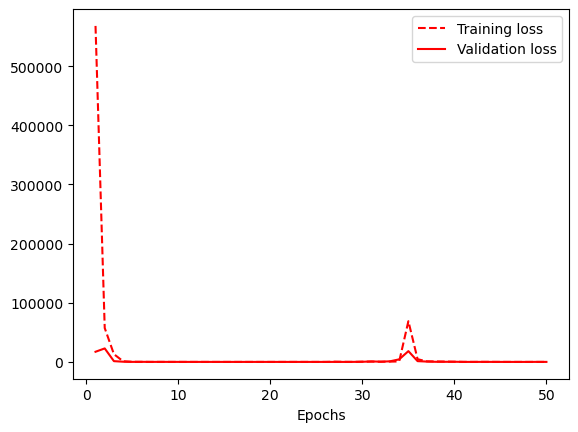

In [38]:
plt.plot(epochs, train_loss, 'r--', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
# plt.plot(epochs, train_mae, 'b--', label="Training MAE")
# plt.plot(epochs, val_mae, 'b', label="Validation MAE")
plt.xlabel('Epochs')
plt.legend()

### MLP with KerasTuner

In [2]:
from keras_tuner.tuners import RandomSearch

In [63]:
def build_model(hp):
    model = tf.keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between min_value and max_value
    model.add(tf.keras.layers.Dense(units=hp.Int('input_units', min_value=10, max_value=100, step=30),
                                    input_dim=X.shape[1], activation='relu'))
    
    # add hidden layers with number of layers and neurons per layer tuned by the Keras Tuner
    for i in range(hp.Int('hidden_layers', min_value=1, max_value=8)):
        model.add(tf.keras.layers.Dense(units=hp.Int(f'hidden_units{i}', min_value=10, max_value=100, step=30),
                                        activation='relu'))
    
    # add output layer with fixed number of neurons
    model.add(tf.keras.layers.Dense(2))

    # compile the model with fixed optimizer, loss, and metric
    # tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mean_squared_error', metrics=[pearson_r])

    return model

In [64]:
# define the Keras Tuner object with the search strategy and search parameters
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    overwrite=True,
    max_trials=10,
    executions_per_trial=3
)

In [ ]:
# search for the best model architecture
tuner.search(x=X,
             y=y,
             epochs=50,
             batch_size=32,
             validation_split=0.2)

In [53]:
best_model = tuner.get_best_models()[0]

In [54]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                12760     
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 90)                2790      
                                                                 
 dense_3 (Dense)             (None, 20)                1820      
                                                                 
 dense_4 (Dense)             (None, 40)                840       
                                                                 
 dense_5 (Dense)             (None, 20)                820       
                                                                 
 dense_6 (Dense)             (None, 10)                2

In [55]:
best_model_history = best_model.fit(X, y, epochs=50, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 2s 29ms/step - loss: 4.0173 - pearson_corr: 1.0135e-09 - val_loss: 3.8279 - val_pearson_corr: -8.9986e-09
Epoch 2/50
20/20 [==============================] - 1s 32ms/step - loss: 4.0076 - pearson_corr: 7.7384e-09 - val_loss: 3.8470 - val_pearson_corr: 2.8794e-09
Epoch 3/50
20/20 [==============================] - 1s 32ms/step - loss: 4.0074 - pearson_corr: nan - val_loss: 3.8164 - val_pearson_corr: 7.4264e-08
Epoch 4/50
20/20 [==============================] - 0s 15ms/step - loss: 4.0060 - pearson_corr: 3.2269e-09 - val_loss: 3.8228 - val_pearson_corr: -6.0309e-08
Epoch 5/50
20/20 [==============================] - 0s 12ms/step - loss: 4.0122 - pearson_corr: -4.8232e-09 - val_loss: 3.8544 - val_pearson_corr: 8.1617e-08
Epoch 6/50
20/20 [==============================] - 0s 14ms/step - loss: 4.0227 - pearson_corr: -6.3308e-09 - val_loss: 3.8369 - val_pearson_corr: -2.0322e-08
Epoch 7/50
20/20 [==============================] - 0s 19ms/

## CNN

## Evolutionary algorithm